### This is a WinBUGS program for the real example in Chapter 6, Section 6.6.2.

Model: Structural Equation Model with Ordered Categorical Variables

Data Set Names: YO.dat, and XI.dat, where XI.dat are input initial values for xi.

Sample Size: N = 338

In [1]:
source(".Rprofile")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: coda

Loading required package: boot

This is cmdstanr version 0.6.1

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /home/pal_bjartan/.cmdstan/cmdstan-2.33.1

- CmdStan version: 2.33.1

This is bayesplot version 1.10.0

- Online documentation and 

#### Model

In [3]:
model <- glue("{getwd()}/Chapter6/ch6-BUGS-model.txt")

#### Data Set

In [20]:
data <- list(
    N = 338, 
    P = 26,
    R = structure(
        .Data = c(
            8.0, 0.0, 0.0, 0.0,
            0.0, 8.0, 0.0, 0.0,
            0.0, 0.0, 8.0, 0.0,
            0.0, 0.0, 0.0, 8.0
        ),
        .Dim = c(4,4)),
    thd = matrix(
        c(
            -200.000,-2.517,-1.245,-0.444, 0.848,200.000,
            -200.000,-1.447,-0.420, 0.119, 1.245,200.000,
            -200.000,-1.671,-0.869,-0.194, 0.679,200.000,
            -200.000,-1.642,-0.869,-0.293, 0.332,200.000,
            -200.000,-1.671,-0.827, 0.052, 0.756,200.000,
            -200.000,-1.769,-1.098,-0.469, 0.255,200.000,
            -200.000,-1.490,-0.670,-0.082, 0.880,200.000,
            -200.000,-1.933,-0.880,-0.317, 1.008,200.000,
            -200.000,-1.587,-0.624, 0.000, 1.008,200.000,
            -200.000,-1.983,-1.348,-0.348, 1.045,200.000,
            -200.000,-1.983,-1.229,-0.247, 0.869,200.000,
            -200.000,-2.262,-1.426, 0.037, 1.330,200.000,
            -200.000,-2.371,-1.295,-0.224, 0.651,200.000,
            -200.000,-2.039,-1.112,-0.149, 1.169,200.000,
            -200.000,-2.262,-1.198,-0.309, 1.198,200.000,
            -200.000,-2.176,-1.537,-0.717, 0.597,200.000,
            -200.000,-1.447,-0.786, 0.119, 1.008,200.000,
            -200.000,-2.039,-1.769,-0.661, 0.642,200.000,
            -200.000,-2.262,-1.468, 0.015, 1.214,200.000,
            -200.000,-2.039,-1.406, 0.000, 1.140,200.000,
            -200.000,-1.702,-1.058, 0.149, 0.902,200.000,
            -200.000,-2.262,-1.426,-0.309, 0.971,200.000,
            -200.000,-1.702,-0.615, 0.179, 1.229,200.000,
            -200.000,-2.262,-1.671,-1.033, 0.420,200.000,
            -200.000,-2.262,-1.468,-0.689, 1.045,200.000,
            -200.000,-2.176,-1.537,-0.880, 0.661,200.000
        ),
        nrow = 26,
        ncol = 6,
        byrow = TRUE
    ),
    z = matrix(
        scan(
            file = "./Chapter6/ch6-WinBUGS-data.dat",
            what = numeric(),
            sep = ",",
            skip = 2,
            nlines = 338
        ) %>% na.omit(),
        ncol=26
    )
)

#### Two different Initial Values

In [25]:
χ_priors <- matrix(
    scan(
        file = "./Chapter6/ch6-WinBUGS-data.dat",
        what = numeric(),
        sep = ",",
        skip = 342
    ) %>% na.omit(),
    ncol = 4
)

inits <- function() {
    list(
        lam = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0),
        psi = c(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0),
        psd = 1.0,
        gam = c(1.0, 1.0, 1.0, 1.0),
        phi = structure(
            .Data = c(1.0, 0.0, 0.0, 0.0,
                        0.0, 1.0, 0.0, 0.0,
                        0.0, 0.0, 1.0, 0.0,
                        0.0, 0.0, 0.0, 1.0),
            .Dim = c(4,4)),
        xi = χ_priors
    )

    list(
        lam = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
        psi = c(0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5),
        psd = 0.6,
        gam = c(0.0, 0.0, 0.0, 0.0),
        phi = structure(
            .Data = c(0.5, 0.0, 0.0, 0.0,
                    0.0, 0.5, 0.0, 0.0,
                    0.0, 0.0, 0.5, 0.0,
                    0.0, 0.0, 0.0, 0.5),
            .Dim = c(4,4)),
        xi = χ_priors
    )
}

In [37]:
param <- c("lam", "psi", "gam", "phi", "xi")
n.iter <- 5000
n.burnin  <- 2000

In [41]:

model.out <- R2OpenBUGS::bugs(
    data, 
    inits, 
    param[-5], 
    n.iter,
    model.file = model,
    n.chains = 2,
    n.burnin = n.burnin,
    # debug = TRUE,
    # codaPkg = TRUE,
    # OpenBUGS.pgm = paste0(Sys.getenv("HOME"), "/.wine/drive_c/Program Files (x86)/OpenBUGS/OpenBUGS323/OpenBUGS.exe"),
    working.directory = paste0(getwd(), "/Chapter6/bugs-output")# ,
    # useWINE = TRUE,
    # WINE = "/usr/bin/wine",
    # WINEPATH = "/usr/bin/winepath"
)


Registered S3 methods overwritten by 'R2OpenBUGS':
  method            from     
  print.bugs        R2WinBUGS
  plot.bugs         R2WinBUGS
  as.mcmc.list.bugs R2WinBUGS



Abstracting deviance ... 3000 valid values
Abstracting gam[1] ... 3000 valid values
Abstracting gam[2] ... 3000 valid values
Abstracting gam[3] ... 3000 valid values
Abstracting gam[4] ... 3000 valid values
Abstracting lam[1] ... 3000 valid values
Abstracting lam[2] ... 3000 valid values
Abstracting lam[3] ... 3000 valid values
Abstracting lam[4] ... 3000 valid values
Abstracting lam[5] ... 3000 valid values
Abstracting lam[6] ... 3000 valid values
Abstracting lam[7] ... 3000 valid values
Abstracting lam[8] ... 3000 valid values
Abstracting lam[9] ... 3000 valid values
Abstracting lam[10] ... 3000 valid values
Abstracting lam[11] ... 3000 valid values
Abstracting lam[12] ... 3000 valid values
Abstracting lam[13] ... 3000 valid values
Abstracting lam[14] ... 3000 valid values
Abstracting lam[15] ... 3000 valid values
Abstracting lam[16] ... 3000 valid values
Abstracting lam[17] ... 3000 valid values
Abstracting lam[18] ... 3000 valid values
Abstracting lam[19] ... 3000 valid values
Abst

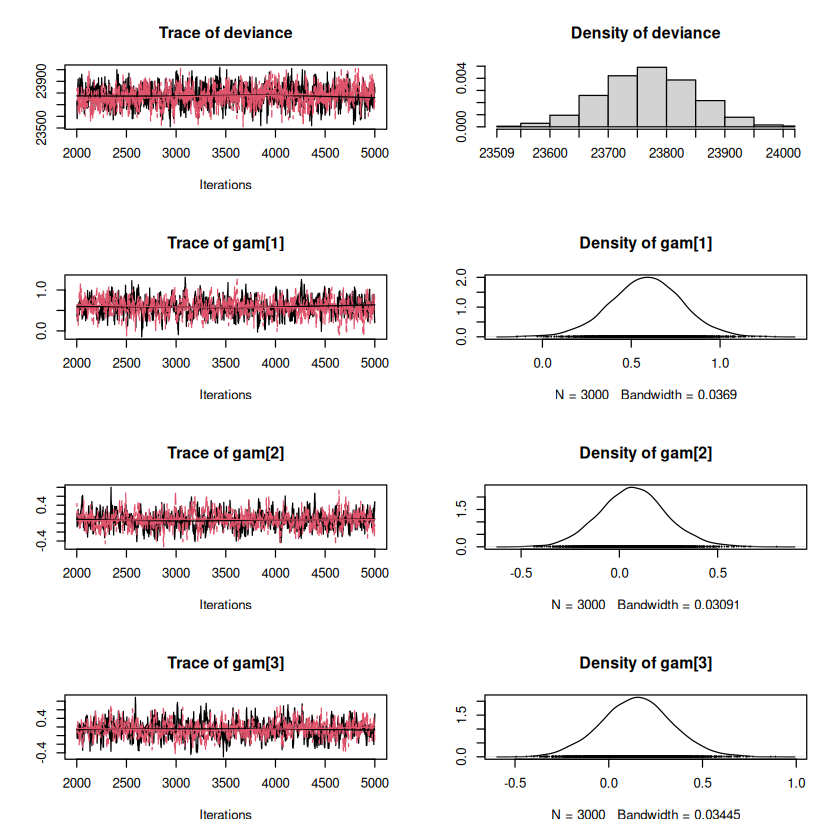

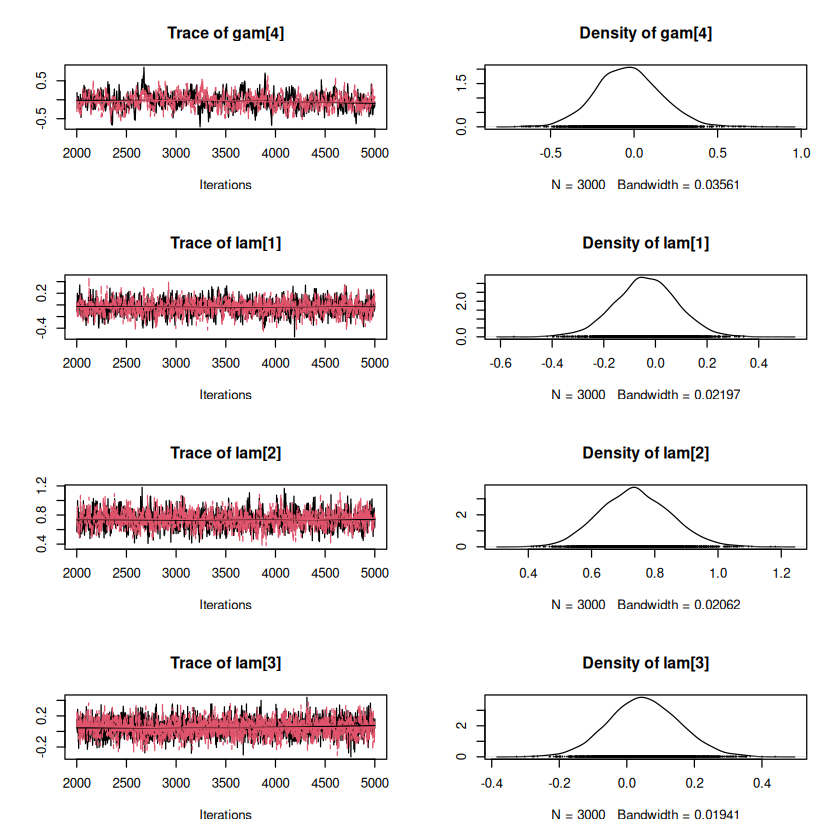

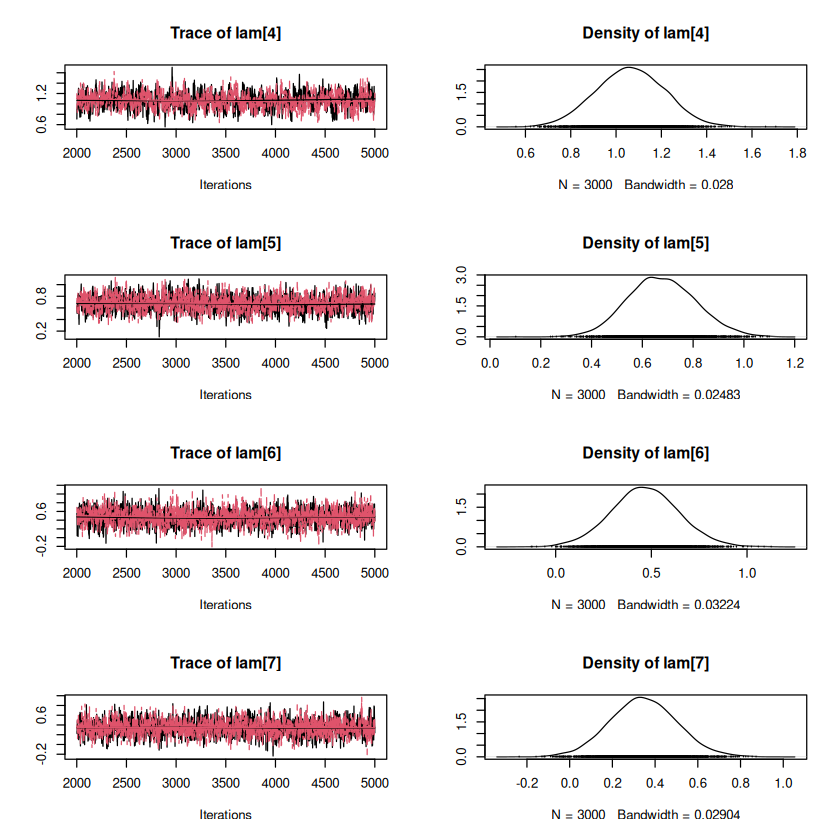

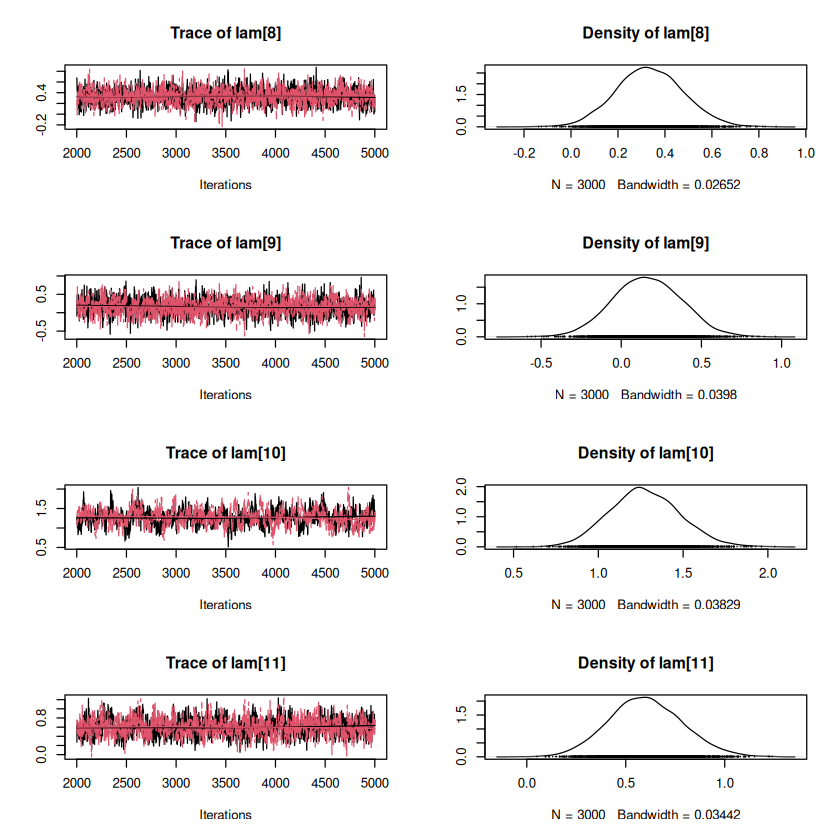

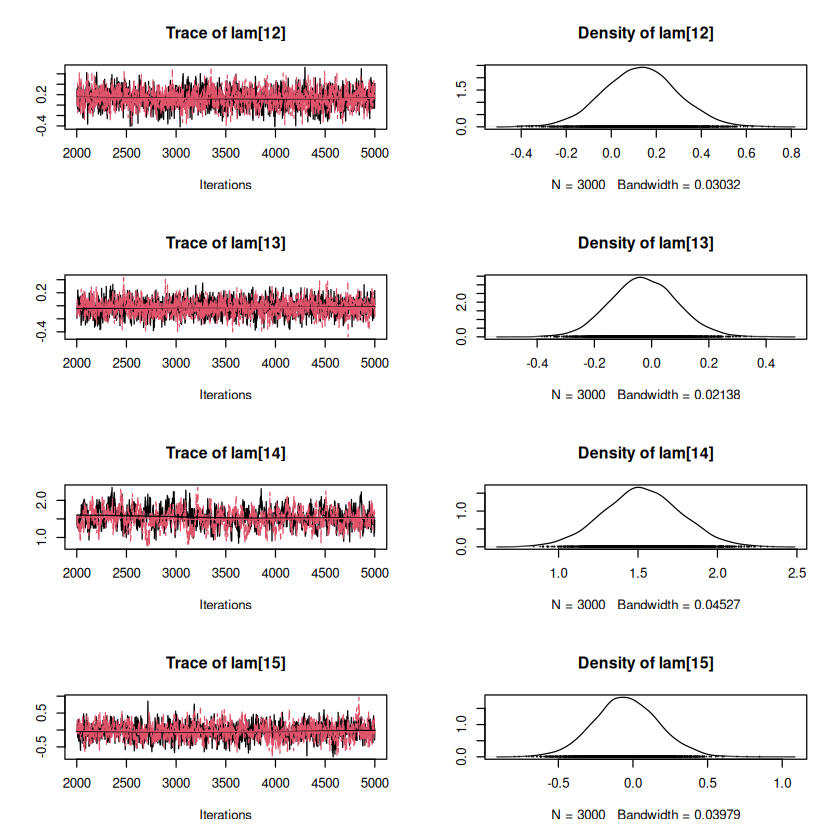

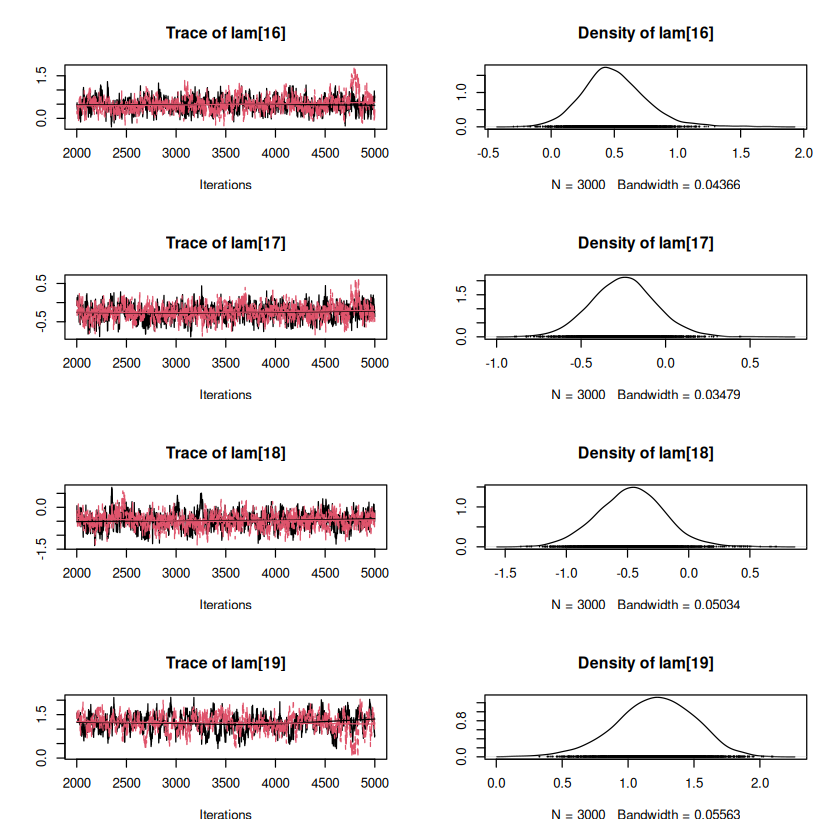

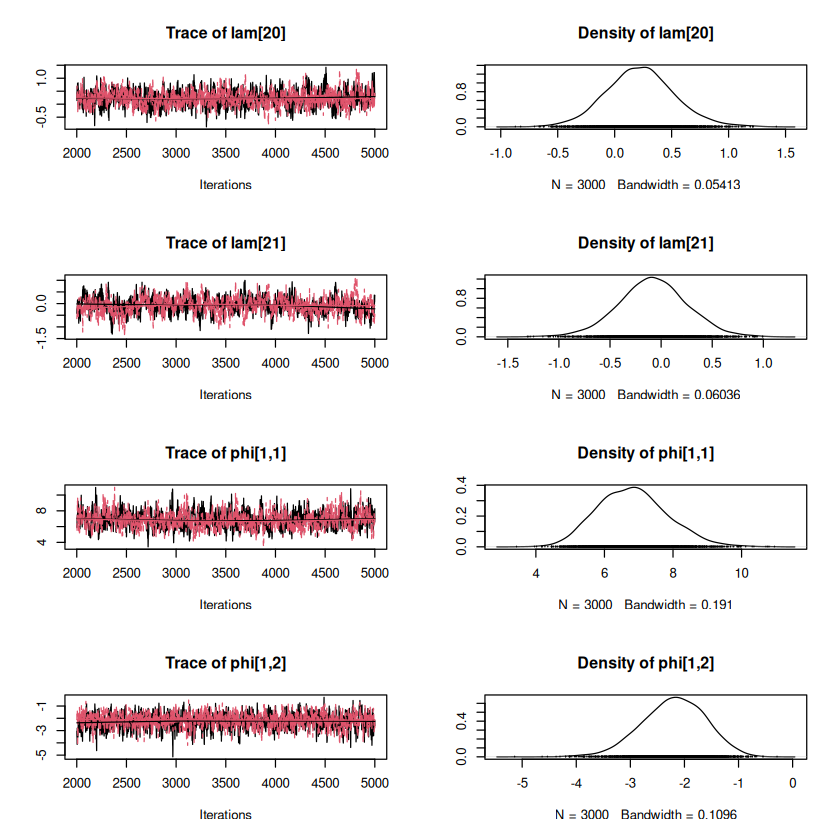

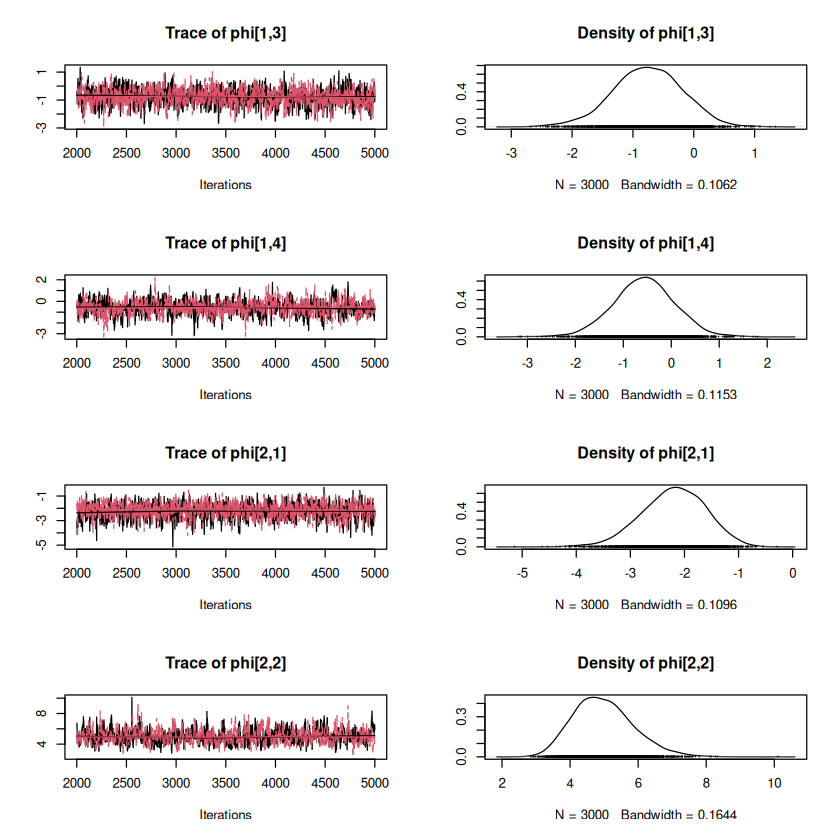

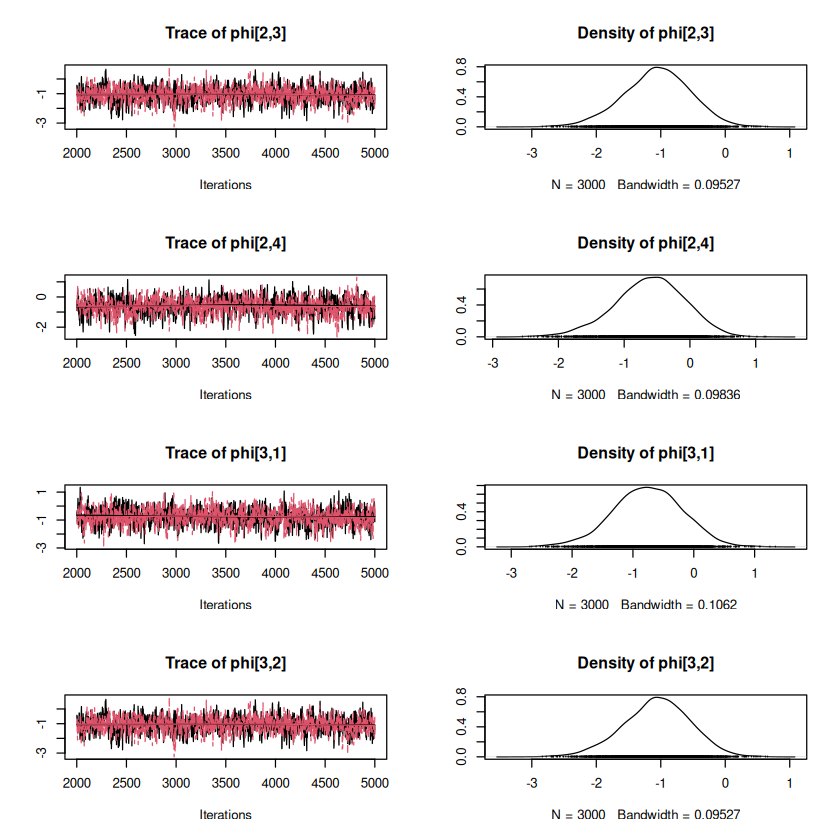

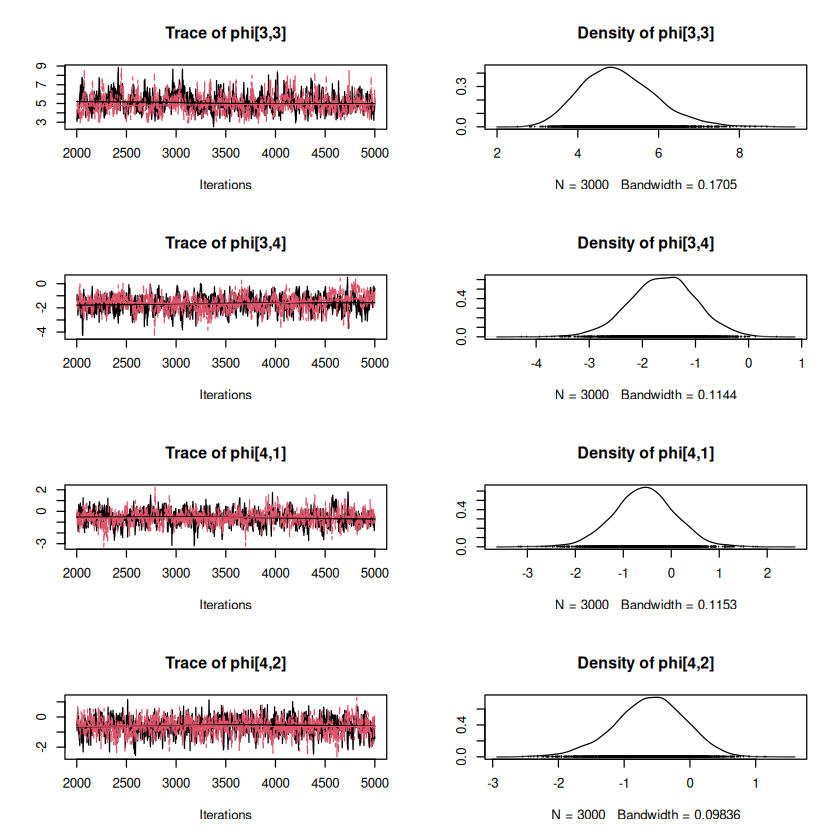

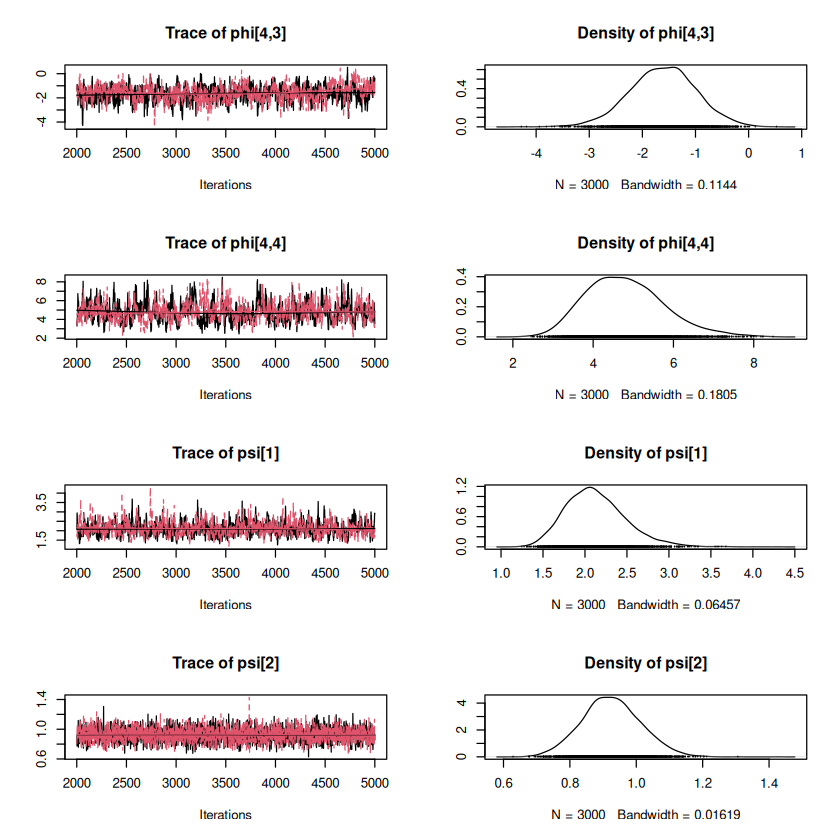

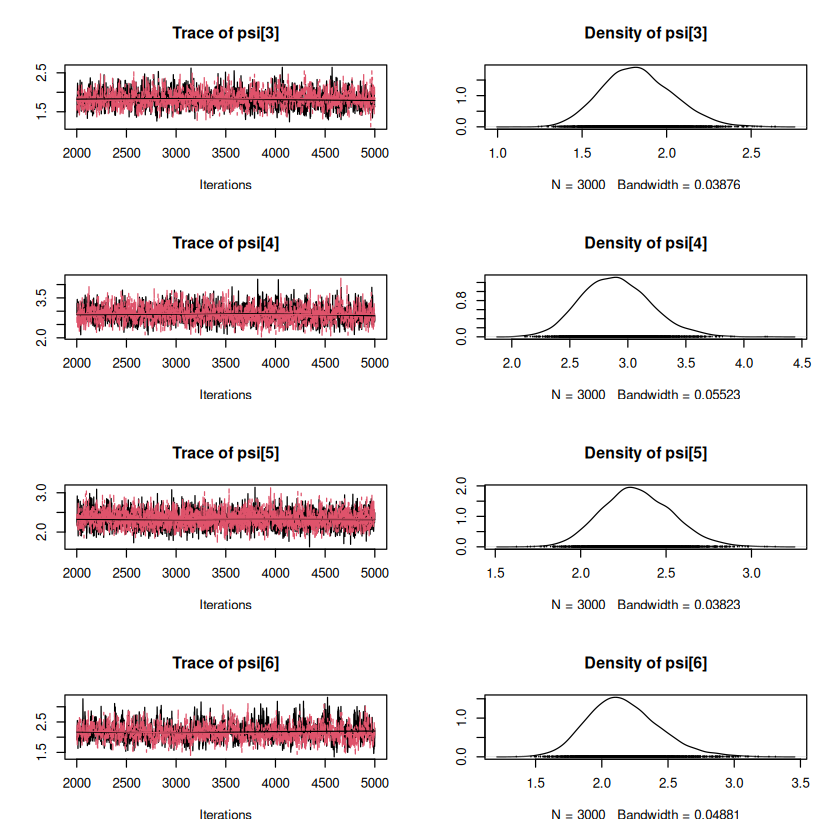

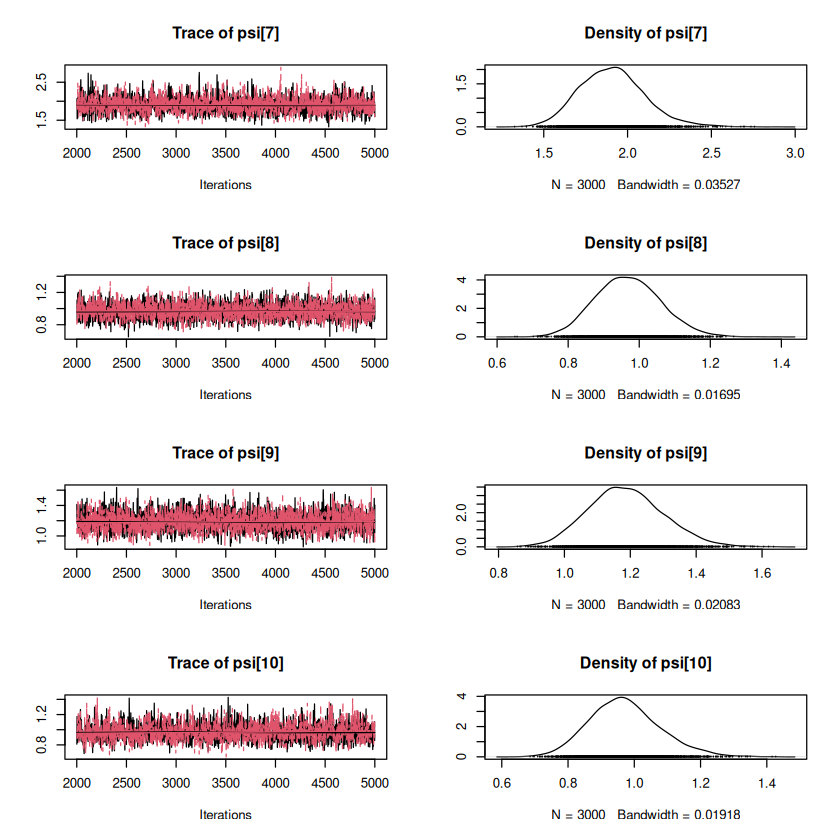

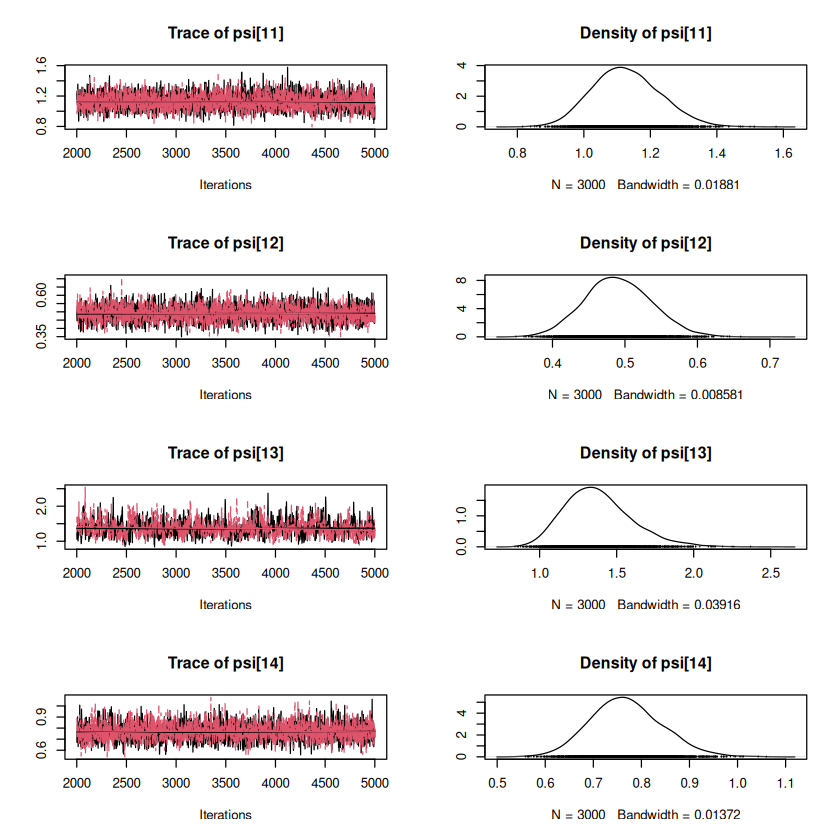

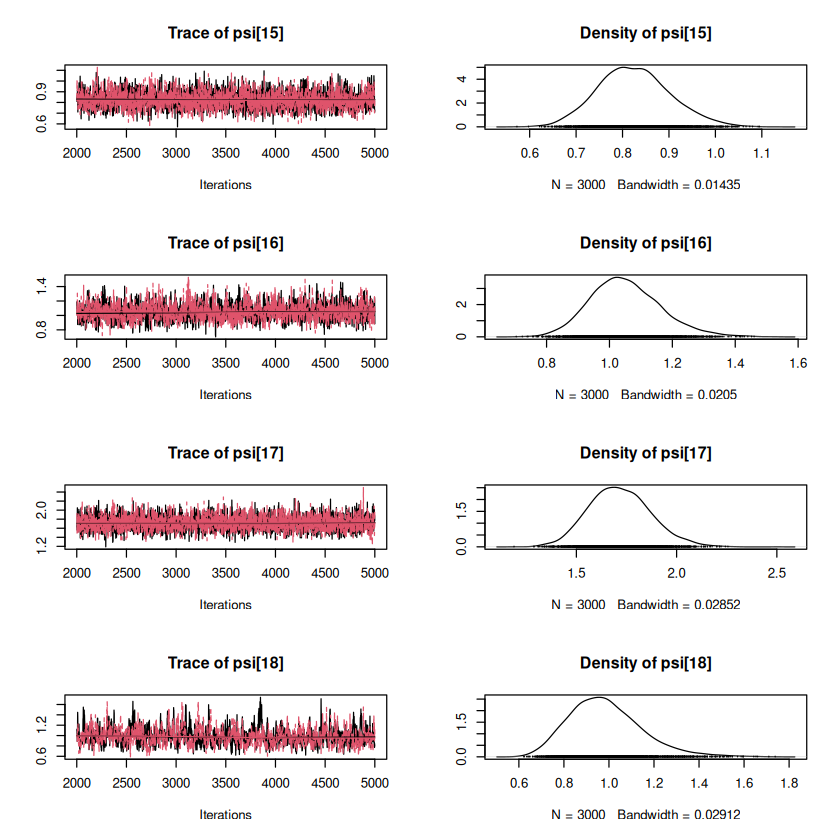

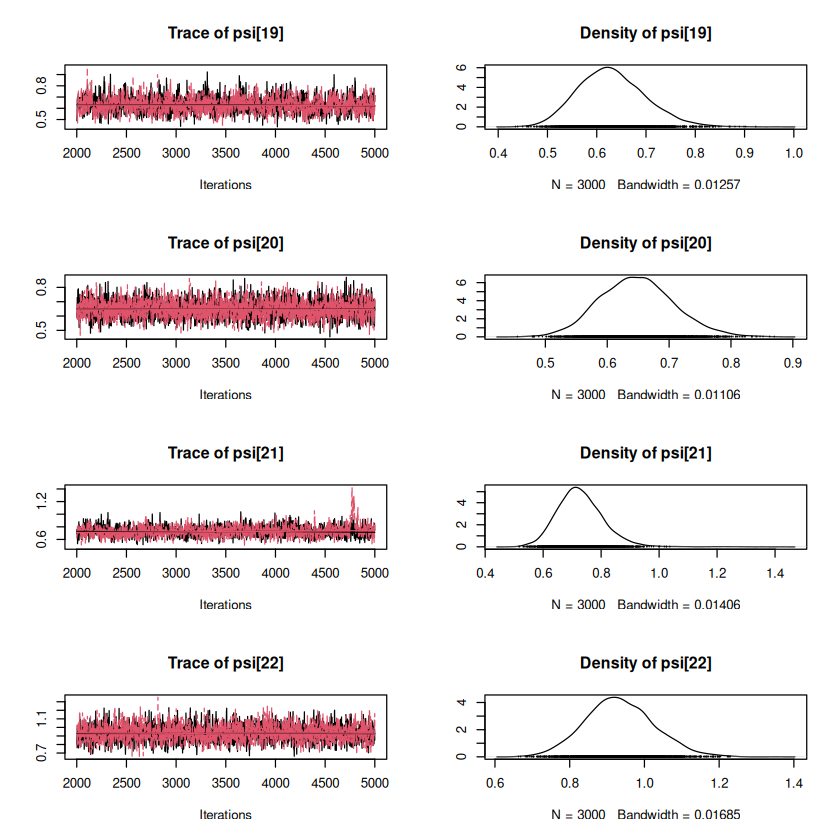

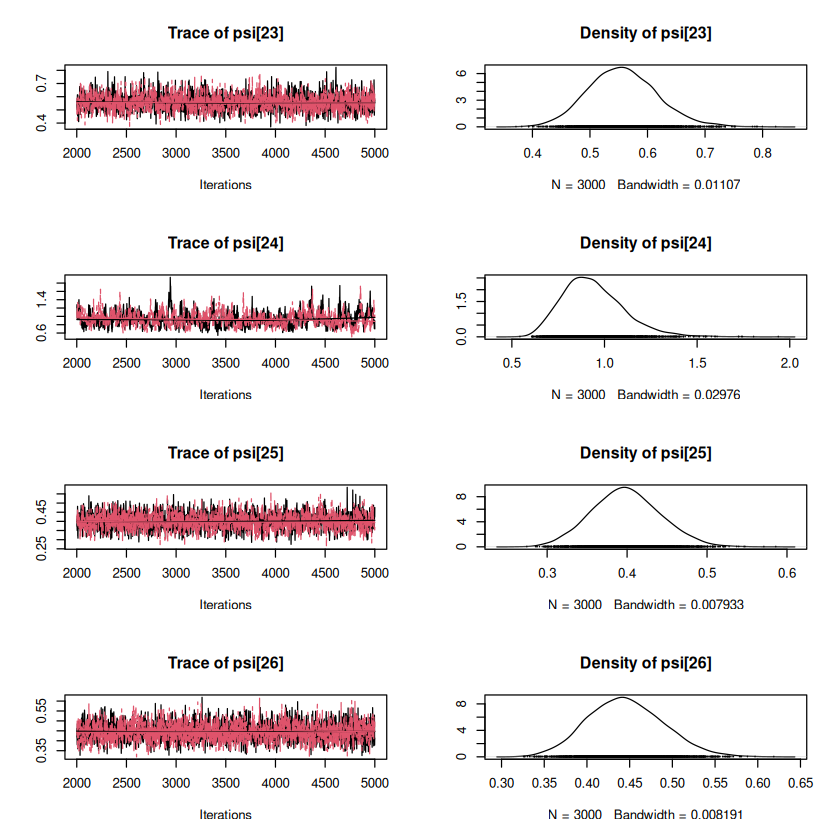

In [45]:
codaobject <- R2OpenBUGS::read.bugs(list.files(glue("{getwd()}/Chapter6/bugs-output/"), pattern = "^CODAchain\\d\\.txt$", full.names = TRUE))
plot(codaobject)
# save.image()

In [ ]:
model.out <- R2WinBUGS::bugs(
    data, 
    inits, 
    param, 
    model.file = model,
    n.chains = 2,
    n.iter = 2*n.iter,
    n.burnin = n.burnin,
    debug = FALSE,
    codaPkg = FALSE,
    bugs.directory = paste0(Sys.getenv("HOME"), "/.wine/drive_c/Program Files (x86)/WinBUGS14/"),
    program = "WinBUGS",
    working.directory = paste0(getwd(), "/Chapter6/bugs-output"),
    WINE = "/usr/bin/wine",
    WINEPATH = "/usr/bin/winepath"
)


In [ ]:
model.out <- R2OpenBUGS::bugs(
    data, 
    inits, 
    param, 
    model.file = model, 
    2*n.iter, 
    n.burnin = n.burnin, 
    codaPkg = FALSE,  # Get bugs object
    working.directory = paste0(getwd(), "/Chapter4/bugs-output")
)
model.out
# save.image()

ERROR: Error in bugs.run(n.burnin, OpenBUGS.pgm, debug = debug, WINE = WINE, : Look at the log file in  /home/pal_bjartan/Backup/PhD/SEM-test-model/Lee2007/Chapter4/bugs-output  and
try again with 'debug=TRUE' to figure out what went wrong within OpenBUGS.


In [ ]:
rjags::jags.model(
    model,
    data,
    inits,
    n.chains = 2,
    n.adapt = n.burnin
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Deleting model



ERROR: Error in rjags::jags.model(model, data, inits, n.chains = 2, n.adapt = n.burnin): RUNTIME ERROR:
Compilation error on line 5.
BUGS I(,) notation is only allowed if all parameters are fixed


